In [1]:
import json
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from pathlib import Path

In [2]:
CONFIG_DIR = Path("../config/")
DATA_DIR = Path("../data/")

In [3]:
def get_creds(name):
    with CONFIG_DIR.joinpath("cfg_02_creds.json").open(encoding="utf-8") as data:
        return json.load(data).get(name)

In [4]:
creds = get_creds("hackathon_hst")

In [5]:
with psycopg2.connect(**creds) as conn:
    with conn.cursor() as cur:
        query = "select * from public.features"
        cur.execute(query)
        cols = [desc[0] for desc in cur.description]
        data = pd.DataFrame(cur.fetchall(), columns=cols)
        

In [6]:
data.head(5)

,id,light,region,schema,address,category,datetime,severity,dead_count,injured_count,parent_region,participants_count,origin_file
0,2311491,"В темное время суток, освещение отсутствует",Барнаул,610,"г Барнаул, тракт Павловский, 249 а",Наезд на препятствие,2017-09-04 22:15:00,Легкий,0,1,Алтайский край,2,altaiskii-krai.geojson
1,2589161,Светлое время суток,Барнаул,070,"г Барнаул, ул Малахова, 46",Столкновение,2021-06-29 16:45:00,Легкий,0,1,Алтайский край,3,altaiskii-krai.geojson
2,2577125,"В темное время суток, освещение включено",Барнаул,940,"г Барнаул, А-322 Барнаул - Рубцовск - граница ...",Наезд на препятствие,2021-05-30 21:40:00,Тяжёлый,0,1,Алтайский край,1,altaiskii-krai.geojson
3,2576909,Светлое время суток,Барнаул,130,"г Барнаул, ул Петра Сухова, 83 А",Столкновение,2021-05-29 19:40:00,Тяжёлый,0,1,Алтайский край,3,altaiskii-krai.geojson
4,2575209,Светлое время суток,Барнаул,500,"г Барнаул, ул Партизанская, 26",Столкновение,2021-05-25 16:40:00,Легкий,0,1,Алтайский край,2,altaiskii-krai.geojson


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198510 entries, 0 to 198509
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   id                  198510 non-null  int64         
 1   light               198510 non-null  object        
 2   region              198510 non-null  object        
 3   schema              184946 non-null  object        
 4   address             190290 non-null  object        
 5   category            198510 non-null  object        
 6   datetime            198510 non-null  datetime64[ns]
 7   severity            198510 non-null  object        
 8   dead_count          198510 non-null  int64         
 9   injured_count       198510 non-null  int64         
 10  parent_region       198510 non-null  object        
 11  participants_count  198510 non-null  int64         
 12  origin_file         198510 non-null  object        
dtypes: datetime64[ns](1), int64(4

In [8]:
data.describe(include = ["number"]).T

,count,mean,std,min,25%,50%,75%,max
id,198510.0,2.214648e+06,286204.882635,1579045.0,1974944.25,2237558.5,2351253.75,2760610.0
dead_count,198510.0,1.109566e-01,0.385301,0.0,0.00,0.0,0.00,17.0
injured_count,198510.0,1.270299e+00,0.909691,0.0,1.00,1.0,1.00,39.0
participants_count,198510.0,2.444003e+00,1.174216,1.0,2.00,2.0,3.00,51.0


In [9]:
data.describe(exclude = ["number", "datetime"]).T

,count,unique,top,freq
light,198510,6,Светлое время суток,127125
region,198510,443,Челябинск,12702
schema,184946,60,070,16138
address,190290,113679,"г Братск, проезд Стройиндустрии, 0",70
category,198510,18,Столкновение,80628
severity,198510,3,Легкий,115710
parent_region,198510,20,Челябинская область,30759
origin_file,198510,20,cheliabinskaia-oblast.geojson,30759


<AxesSubplot:>

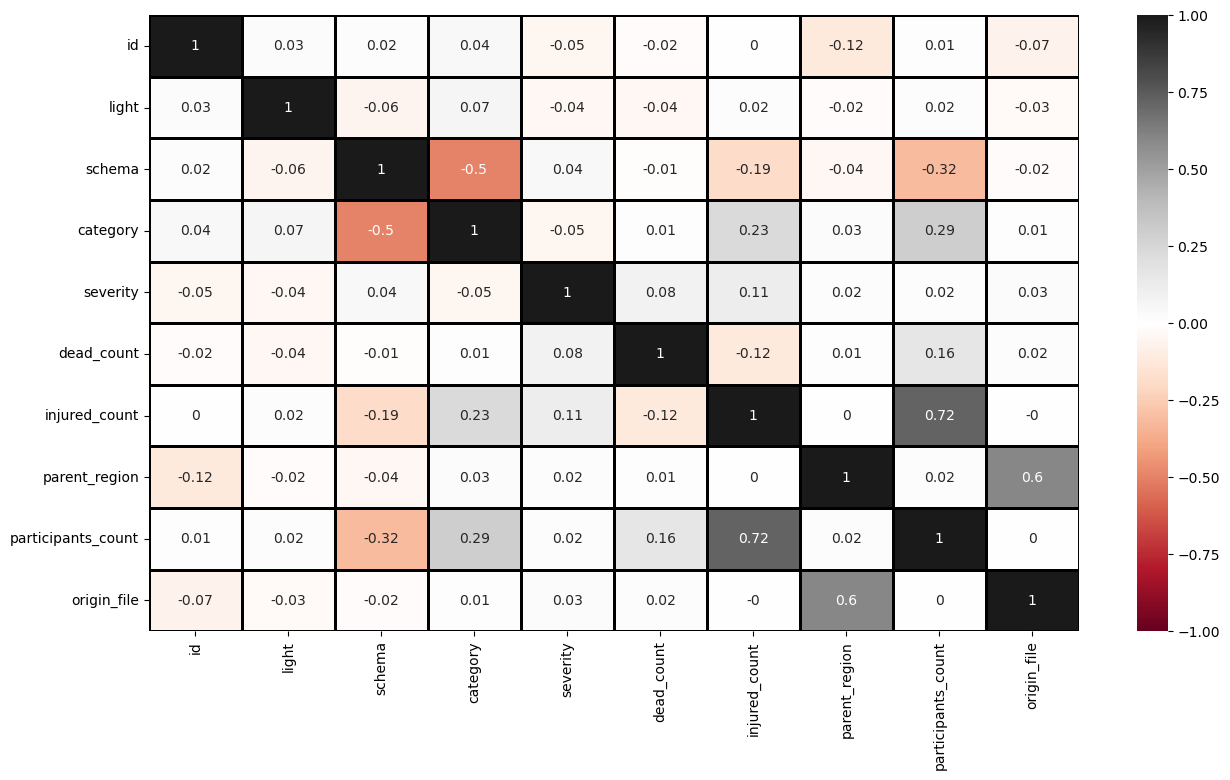

In [15]:
plt.subplots(figsize = (15, 8))
sns.heatmap(data.corr().round(2), annot = True, vmin = -1, vmax = 1, center = 0, 
            cmap = "RdGy", linewidth = 1, linecolor = "black")

In [11]:
data["light"] = LabelEncoder().fit_transform(data["light"])
data["schema"] = LabelEncoder().fit_transform(data["schema"])
data["category"] = LabelEncoder().fit_transform(data["category"])
data["severity"] = LabelEncoder().fit_transform(data["severity"])
data["parent_region"] = LabelEncoder().fit_transform(data["parent_region"])
data["origin_file"] = LabelEncoder().fit_transform(data["origin_file"])

In [12]:
data.describe(include = ["number"]).T

,count,mean,std,min,25%,50%,75%,max
id,198510.0,2.214648e+06,286204.882635,1579045.0,1974944.25,2237558.5,2351253.75,2760610.0
light,198510.0,2.971825e+00,1.644631,0.0,2.00,4.0,4.00,5.0
schema,198510.0,3.107427e+01,16.625994,0.0,16.00,30.0,44.00,60.0
category,198510.0,1.260928e+01,3.905230,0.0,9.00,15.0,16.00,17.0
severity,198510.0,7.398217e-01,0.915379,0.0,0.00,0.0,2.00,2.0
dead_count,198510.0,1.109566e-01,0.385301,0.0,0.00,0.0,0.00,17.0
injured_count,198510.0,1.270299e+00,0.909691,0.0,1.00,1.0,1.00,39.0
parent_region,198510.0,8.666883e+00,5.871929,0.0,3.00,8.0,14.00,19.0
participants_count,198510.0,2.444003e+00,1.174216,1.0,2.00,2.0,3.00,51.0
origin_file,198510.0,8.505390e+00,5.742720,0.0,3.00,7.0,13.00,19.0


In [13]:
data.describe(exclude = ["number", "datetime"]).T

,count,unique,top,freq
region,198510,443,Челябинск,12702
address,190290,113679,"г Братск, проезд Стройиндустрии, 0",70


In [14]:
data.select_dtypes(include = "number").nunique()

id                    198510
light                      6
schema                    61
category                  18
severity                   3
dead_count                14
injured_count             32
parent_region             20
participants_count        37
origin_file               20
dtype: int64